In [ ]:
# load csv files into folder
# https://github.com/hantswilliams/HHA-507-2025/blob/main/assignments/assignment5_files/assignment_claims.md
# Own Repo
#https://github.com/nbarc888/507_assign_4/blob/main/readme.md

# Please note csv files names are renamed as follows:
|name|new name|
|---|---|
|STONYBRK_20240531_CODE.csv|SB_CODE.csv|
|STONYBRK_20240531_HEADER.csv|SB_HEADER.csv|
|STONYBRK_20240531_LINE.csv|SB_LINE.csv|

In [ ]:
# read each file first 5 rows
# list observations

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Document your observations about:

How many unique claims are in the dataset?

What is the date range of the claims?

How many service lines are there on average per claim?

How many diagnosis codes are there on average per claim?

In [ ]:
# read file "  "
data = pd.read_csv('SB_HEADER.csv', sep=',')
print(data.head())

   ClientId  ProspectiveClaimId ClaimType  BillingProviderNPI  \
0        49            35216986         P          1154376309   
1        49            35235657         P          1154376309   
2        49            35249003         P          1154376309   
3        49            35249014         P          1154376309   
4        49            35249016         P          1154376309   

               BillingProvFirstName  BillingProvLastName  \
0  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
1  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
2  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
3  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
4  NEW YORK SPINE AND BRAIN SURGERY                  NaN   

   AttendingProviderNPI AttendingProvFirstName AttendingProvLastName  \
0                   NaN                    NaN                   NaN   
1                   NaN                    NaN                   NaN   
2                   NaN         

In [ ]:
# read file "  "
data = pd.read_csv('SB_LINE.csv', sep=',')
print(data.head())

   ClientId  ProspectiveClaimId  LinePos  RevCode  HCPCS Modifier1 Modifier2  \
0        49            35216986        1      NaN  99291        GC        25   
1        49            35235657        1      NaN  99291        GC        25   
2        49            35244774        1      NaN  99291        GC        25   
3        49            35249003        1      NaN  99291        GC       NaN   
4        49            35249014        1      NaN  99291        GC       NaN   

   Modifier3  Modifier4            DxMapDelim  ...  PlaceOfService  NDC  \
0        NaN        NaN  1,2,3,4,5,6,7,8,9,10  ...              21  NaN   
1        NaN        NaN  1,2,3,4,5,6,7,8,9,10  ...              21  NaN   
2        NaN        NaN  1,2,3,4,5,6,7,8,9,10  ...              21  NaN   
3        NaN        NaN           1,2,3,4,5,6  ...              21  NaN   
4        NaN        NaN           1,2,3,4,5,6  ...              21  NaN   

   NDCUnits  NDCRx NDCUnitQualifier RenderingProvNPI  CoderId  CodeN

In [ ]:
# using Code file
data = pd.read_csv('SB_CODE.csv', sep=',')
print(data.head())

   ClientId  ProspectiveClaimId CodeQualifier  CodePos CodeValue  \
0        49            36752505           ABF        3     G93.6   
1        49            36819490           ABF        4     N17.9   
2        49            35352862           ABF        2     G06.1   
3        49            35244774           ABF       10     G90.8   
4        49            36745815           ABK        1   I77.819   

   CodeFromDate  CodeToDate  CodeAmnt  POAInd  
0           NaN         NaN       NaN     NaN  
1           NaN         NaN       NaN     NaN  
2           NaN         NaN       NaN     NaN  
3           NaN         NaN       NaN     NaN  
4           NaN         NaN       NaN     NaN  


In [ ]:
# How many unique claims are in the dataset?
# using ProspectiveClaimId
ProspectiveClaimId = data['ProspectiveClaimId']

In [ ]:
claimid_frequency = ProspectiveClaimId.value_counts()
print("Unique Claims in the Dataset:\n", claimid_frequency)


Unique Claims in the Dataset:
 ProspectiveClaimId
36692474    12
36669405    12
36761055    12
36692475    12
36732721    12
            ..
36951902     1
36899846     1
36782313     1
36489854     1
36653553     1
Name: count, Length: 388, dtype: int64


In [ ]:
# What is the date range of the claims?
Codefromdate = data['CodeFromDate']
Codetodate = data['CodeToDate']

In [ ]:
# Read CodeFromDate and CodeToDate columns
code_dates = data[['CodeFromDate', 'CodeToDate']]

# Display the first few rows
print("CodeFromDate and CodeToDate columns:")
print(code_dates.head())

CodeFromDate and CodeToDate columns:
   CodeFromDate  CodeToDate
0           NaN         NaN
1           NaN         NaN
2           NaN         NaN
3           NaN         NaN
4           NaN         NaN


In [ ]:
header_data = pd.read_csv('SB_HEADER.csv', sep=',')
print(header_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ClientId                 388 non-null    int64  
 1   ProspectiveClaimId       388 non-null    int64  
 2   ClaimType                388 non-null    object 
 3   BillingProviderNPI       388 non-null    int64  
 4   BillingProvFirstName     388 non-null    object 
 5   BillingProvLastName      0 non-null      float64
 6   AttendingProviderNPI     2 non-null      float64
 7   AttendingProvFirstName   2 non-null      object 
 8   AttendingProvLastName    2 non-null      object 
 9   RenderingProviderNPI     388 non-null    int64  
 10  RenderingProvFirstName   388 non-null    object 
 11  RenderingProvLastName    388 non-null    object 
 12  ReferringProviderNPI     87 non-null     float64
 13  ReferringProvFirstName   87 non-null     object 
 14  ReferringProvLastName    8

In [ ]:
# Finding Dates of Claims
# Convert date columns to datetime objects
header_data['ServiceFromDate'] = pd.to_datetime(header_data['ServiceFromDate'])
header_data['ServiceToDate'] = pd.to_datetime(header_data['ServiceToDate'])

# Find the minimum and maximum dates
min_date = header_data['ServiceFromDate'].min()
max_date = header_data['ServiceToDate'].max()

print(f"Date range of claims: {min_date} to {max_date}")

Date range of claims: 2023-09-25 00:00:00 to 2024-05-29 00:00:00


/tmp/ipython-input-1776134477.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  header_data['ServiceFromDate'] = pd.to_datetime(header_data['ServiceFromDate'])
/tmp/ipython-input-1776134477.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  header_data['ServiceToDate'] = pd.to_datetime(header_data['ServiceToDate'])


Question 1: Provider Analysis
---
Who are the top 5 billing providers by number of claims?

Display: Provider name, NPI, and claim count

Create a simple bar chart showing the top 5 providers

NOTE: THIS USES THE SB_HEADER.csv file

In [ ]:
data = pd.read_csv('SB_HEADER.csv', sep=',')
print(data.head())

   ClientId  ProspectiveClaimId ClaimType  BillingProviderNPI  \
0        49            35216986         P          1154376309   
1        49            35235657         P          1154376309   
2        49            35249003         P          1154376309   
3        49            35249014         P          1154376309   
4        49            35249016         P          1154376309   

               BillingProvFirstName  BillingProvLastName  \
0  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
1  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
2  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
3  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
4  NEW YORK SPINE AND BRAIN SURGERY                  NaN   

   AttendingProviderNPI AttendingProvFirstName AttendingProvLastName  \
0                   NaN                    NaN                   NaN   
1                   NaN                    NaN                   NaN   
2                   NaN         

In [ ]:
# billing provider: BillingProviderNPI and BillingProvFirstName
BillingProviderNPI = data['BillingProviderNPI']
BillingProvFirstName = data['BillingProvFirstName']
BPNPI_frequency = BillingProviderNPI.value_counts()
BPFN_frequency = BillingProvFirstName.value_counts()


In [ ]:
print("Top 5 Billing Providers within dataset")
print(BPFN_frequency.head())
print(BPNPI_frequency.head())


Top 5 Billing Providers within dataset
BillingProvFirstName
SB INTERNISTS                          152
SB SURGICAL ASSOCIATES                  81
NEW YORK SPINE AND BRAIN SURGERY        69
UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY     40
SB PSYCHIATRIC ASSOCIATES               36
Name: count, dtype: int64
BillingProviderNPI
1821035601    152
1063468536     81
1154376309     69
1538114723     40
1437105905     36
Name: count, dtype: int64


/tmp/ipython-input-1765182042.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


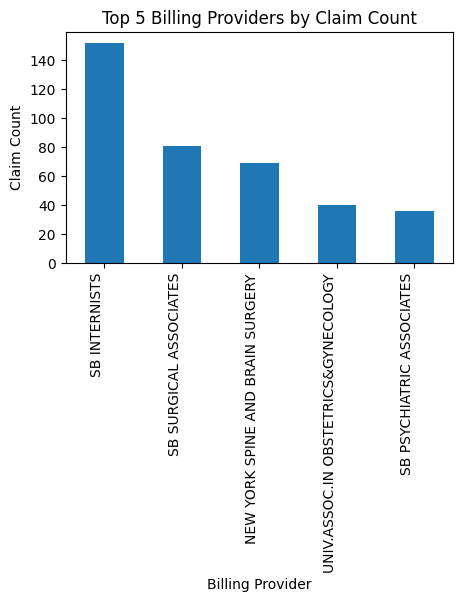

In [ ]:
# Chart of the top 5 billing providers
tp_5_providers = BPFN_frequency.head(5)

plt.figure(figsize=(5, 3))
tp_5_providers.plot(kind='bar')
plt.title('Top 5 Billing Providers by Claim Count')
plt.xlabel('Billing Provider')
plt.ylabel('Claim Count')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

Question 2: Payer Mix Analysis
---
What are the top 5 primary payers by claim volume?

Calculate the percentage of total claims for each payer

Create a bar chart or pie chart showing payer distribution

Note This Uses Header file

In [ ]:
data = pd.read_csv('SB_HEADER.csv', sep=',')
print(data.head())

   ClientId  ProspectiveClaimId ClaimType  BillingProviderNPI  \
0        49            35216986         P          1154376309   
1        49            35235657         P          1154376309   
2        49            35249003         P          1154376309   
3        49            35249014         P          1154376309   
4        49            35249016         P          1154376309   

               BillingProvFirstName  BillingProvLastName  \
0  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
1  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
2  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
3  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
4  NEW YORK SPINE AND BRAIN SURGERY                  NaN   

   AttendingProviderNPI AttendingProvFirstName AttendingProvLastName  \
0                   NaN                    NaN                   NaN   
1                   NaN                    NaN                   NaN   
2                   NaN         

In [ ]:
# use PrimaryPayerName
PrimaryPayerName = data['PrimaryPayerName']
PrimaryPayerName_frequency = PrimaryPayerName.value_counts()

In [ ]:
print("Top 5 Primary Payers within dataset")
print(PrimaryPayerName_frequency.head())

Top 5 Primary Payers within dataset
PrimaryPayerName
MEDICARE                      242
HEALTHFIRST FFS                46
FIDELIS/BETTER HEALTH PLAN     26
HIP MEDICAID                   17
HEALTHFIRST CAPITATED          10
Name: count, dtype: int64


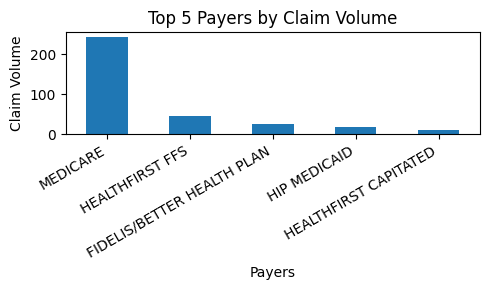

In [ ]:
# Chart of the top 5 Primary payers
tp_5_payers = PrimaryPayerName_frequency.head(5)

plt.figure(figsize=(5, 3))
tp_5_payers.plot(kind='bar')
plt.title('Top 5 Payers by Claim Volume')
plt.xlabel('Payers')
plt.ylabel('Claim Volume')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the total percentage of claims per payer
total_claims = PrimaryPayerName_frequency.sum()
payer_percentages = (PrimaryPayerName_frequency / total_claims) * 100

print("Percentage of Total Claims per Payer:")
print(payer_percentages)

Percentage of Total Claims per Payer:
PrimaryPayerName
MEDICARE                                  62.371134
HEALTHFIRST FFS                           11.855670
FIDELIS/BETTER HEALTH PLAN                 6.701031
HIP MEDICAID                               4.381443
HEALTHFIRST CAPITATED                      2.577320
AETNA                                      1.546392
DIRECT SELF PAY                            1.546392
UNITED COMMUNITY PLAN GOVT PROGRAM         1.288660
FIDELIS CAPITATED                          1.288660
EMPIRE BLUE SR                             1.030928
MAGNACARE                                  0.773196
MMIS                                       0.515464
EMPIRE BLUE PPO                            0.515464
AETNA MEDICARE                             0.515464
CIGNA HMO                                  0.515464
MEDICAID EMERGENT SERVICES                 0.515464
TRICARE HUMANA                             0.257732
EMPIRE BLUE HMO                            0.257732
BLUES EXC

Question 3: Common Diagnoses
---
What are the 10 most frequently appearing diagnosis codes (CodeValue)?

Display: ICD-10 code and frequency count

Note: You may want to look up what these codes mean online (icd10data.com)

CODE FILE Used - Specifically CodeValue

In [ ]:
data = pd.read_csv('SB_CODE.csv', sep=',')
print(data.head())

   ClientId  ProspectiveClaimId CodeQualifier  CodePos CodeValue  \
0        49            36752505           ABF        3     G93.6   
1        49            36819490           ABF        4     N17.9   
2        49            35352862           ABF        2     G06.1   
3        49            35244774           ABF       10     G90.8   
4        49            36745815           ABK        1   I77.819   

   CodeFromDate  CodeToDate  CodeAmnt  POAInd  
0           NaN         NaN       NaN     NaN  
1           NaN         NaN       NaN     NaN  
2           NaN         NaN       NaN     NaN  
3           NaN         NaN       NaN     NaN  
4           NaN         NaN       NaN     NaN  


In [ ]:
CodeValue = data['CodeValue']
CodeValue_frequency = CodeValue.value_counts()

In [ ]:
print("Top ICD codes within dataset")
print(CodeValue_frequency.head())

Top ICD codes within dataset
CodeValue
J96.01    62
I10       49
E78.5     49
G93.5     34
D64.9     29
Name: count, dtype: int64


In [ ]:
tp_10_icd = CodeValue_frequency.head(10)
print(tp_10_icd)

CodeValue
J96.01    62
I10       49
E78.5     49
G93.5     34
D64.9     29
I25.10    27
I61.9     26
I48.91    24
I60.8     24
I50.9     22
Name: count, dtype: int64


In [ ]:
# Link for icd code matches: icd10data.com

|Code Name|Code number|Frequency|
|---|---|---|
|Acute Respiratory Failure with Hypoxia|J96.01|62|
|Primary Hypertension|I10|49|
|HLD|E78.5|49|
|Compression of brain|G93.5|34|
|Anemia|D64.9|29|
|Atherosclerotic heart dx of coronary artery w/o angina pectoris|I25.10|27|
|Nontraumatic intracerebral hemorrhage|I61.9|26|
|Unspecified atrial fibrillation|I48.91|24|
|Other nontraumatic subarachnoid hemorrhage|I60.8|24|
|Heart failure, unspecified|I50.9|22|

Question 4: Common Procedures
---
What are the 10 most frequently billed procedure codes (HCPCS)?

Display: HCPCS code, description (if available in data), and frequency

Create a bar chart showing the top 10 procedures

Use Line

In [ ]:
data = pd.read_csv('SB_LINE.csv', sep=',')
print(data.head())


   ClientId  ProspectiveClaimId  LinePos  RevCode  HCPCS Modifier1 Modifier2  \
0        49            35216986        1      NaN  99291        GC        25   
1        49            35235657        1      NaN  99291        GC        25   
2        49            35244774        1      NaN  99291        GC        25   
3        49            35249003        1      NaN  99291        GC       NaN   
4        49            35249014        1      NaN  99291        GC       NaN   

   Modifier3  Modifier4            DxMapDelim  ...  PlaceOfService  NDC  \
0        NaN        NaN  1,2,3,4,5,6,7,8,9,10  ...              21  NaN   
1        NaN        NaN  1,2,3,4,5,6,7,8,9,10  ...              21  NaN   
2        NaN        NaN  1,2,3,4,5,6,7,8,9,10  ...              21  NaN   
3        NaN        NaN           1,2,3,4,5,6  ...              21  NaN   
4        NaN        NaN           1,2,3,4,5,6  ...              21  NaN   

   NDCUnits  NDCRx NDCUnitQualifier RenderingProvNPI  CoderId  CodeN

In [ ]:
hcpcs = data['HCPCS']
hcpcs_frequency = hcpcs.value_counts()
print(hcpcs_frequency.head())

HCPCS
99291    68
99233    48
99213    39
99223    33
99222    32
Name: count, dtype: int64


In [ ]:
ClientProcedureName = data['ClientProcedureName']

In [ ]:
tp_hcpcs = hcpcs_frequency.head(10)
print("Top 10 HCPCS")
print(tp_hcpcs)

Top 10 HCPCS
HCPCS
99291    68
99233    48
99213    39
99223    33
99222    32
99232    21
90833    16
99204    14
99214    14
92557    14
Name: count, dtype: int64


In [ ]:
top_10_hcpcs = hcpcs_frequency.head(10)

# Merge with the original data to get the procedure names
top_10_hcpcs_with_names = pd.merge(top_10_hcpcs, data[['HCPCS', 'ClientProcedureName']], left_index=True, right_on='HCPCS', how='left')
top_10_hcpcs_with_names = top_10_hcpcs_with_names.drop_duplicates(subset=['HCPCS'])
top_10_hcpcs_with_names = top_10_hcpcs_with_names.rename(columns={'count': 'Frequency', 'ClientProcedureName': 'Description'})

# Display the results, selecting and ordering the columns
print("Top 10 HCPCS Codes with Descriptions and Frequencies:")
display(top_10_hcpcs_with_names[['HCPCS', 'Description', 'Frequency']])

Top 10 HCPCS Codes with Descriptions and Frequencies:


,HCPCS,Description,Frequency
0,99291,"CRITICAL CARE, INITIAL FIRST HOUR",68
44,99233,"SUBSEQUENT HOSP. CARE,PER DAY,FOR THE E&M OF A...",48
61,99213,"OFFICE/OUTPATIENT VISIT,ESTABL.PT,EXPANDED HX,...",39
49,99223,"INITIAL HOSPITAL CARE PER DAY,FOR THE E&M OF ...",33
39,99222,INITIAL HOSPITAL CARE PER DAY FOR THE E&M OF ...,32
52,99232,"SUBS.HOSP.CARE EXPAND.PROBLEM FOCUSED HX.,EXAM...",21
53,90833,"PSYCHOTHERAPY WITH AN E&M SERVICE,30 MINS,PATI...",16
60,99204,OFFICE/OUTPT VISIT FOR THE E & M OF A NEW PAT...,14
70,99214,"OFFICE/OUTPT VISIT,ESTAB. PATIENT,DETAILED HX,...",14
444,92557,COMPREHENSIVE AUDIOMETRY THRESHOLD EVALUATION;...,14


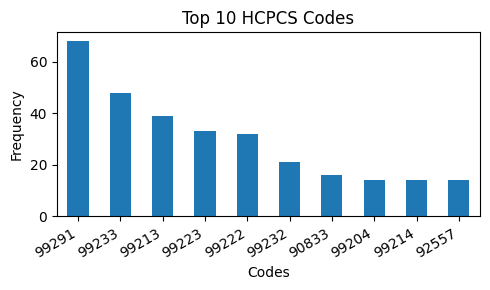

In [ ]:
# Chart of the 10 top 10 hcpcs codes
tp_10_hcpcs = tp_hcpcs.head(10)

plt.figure(figsize=(5, 3))
tp_10_hcpcs.plot(kind='bar')
plt.title('Top 10 HCPCS Codes')
plt.xlabel('Codes')
plt.ylabel('Frequency')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

Question 5: Service Location Analysis
---
How many claims were submitted for each PlaceOfService?

What percentage of claims are for "INPATIENT" vs "DOCTOR'S OFFICE"?


Use Header file

In [ ]:
location_data = pd.read_csv('SB_HEADER.csv', sep=',')

In [ ]:
place_of_service_counts = location_data['PlaceOfService'].value_counts()
print(place_of_service_counts)

PlaceOfService
21    231
11    132
22     24
23      1
Name: count, dtype: int64


In [ ]:
# Display the results
print("Number of claims submitted for each Place of Service:")
# display(location_display_named[['PlaceOfService','Facility_Location']])
print(place_of_service_counts)

Number of claims submitted for each Place of Service:
PlaceOfService
21    231
11    132
22     24
23      1
Name: count, dtype: int64


In [ ]:
# Calculate the total number of claims
total_claims = place_of_service_counts.sum()

# Calculate the percentage of claims for each PlaceOfService
place_of_service_percentages = (place_of_service_counts / total_claims) * 100
print("\nPercentage of claims per Place of Service:")
display(place_of_service_percentages)


Percentage of claims per Place of Service:


,count
PlaceOfService,
21,59.536082
11,34.020619
22,6.185567
23,0.257732


In [ ]:
place_of_location_counts = location_data['Facility_Location'].value_counts()

total_facility = place_of_location_counts.sum()

# Calculate the percentage of claims for each PlaceOfService
place_of_location_percentages = (place_of_location_counts / total_claims) * 100
print("\nPercentage of claims per Place of Service:")
display(place_of_location_percentages)


Percentage of claims per Place of Service:


,count
Facility_Location,
INPATIENT,59.536082
DOCTOR'S OFFICE,34.020619
OUTPATIENT HOSPITAL,3.608247
AMBULATORY SURGERY,2.577320
EMERGENCY,0.257732


PART 3 ADVANCED ANALYSIS with joins

Question 6: Claims with High Service Line Counts
---
Merge the HEADER and LINE files

Calculate the total number of service lines per claim

Identify claims with 5 or more service lines

Display: ClaimId, Provider name, number of lines, and total charges

In [ ]:
header_data = pd.read_csv('SB_HEADER.csv', sep=',')
line_data = pd.read_csv('SB_LINE.csv', sep=',')

merged_header_line = pd.merge(header_data, line_data, on='ProspectiveClaimId', how='inner')

print("Merged Header and Line Data:")
display(merged_header_line.head())

Merged Header and Line Data:


,ClientId_x,ProspectiveClaimId,ClaimType,BillingProviderNPI,BillingProvFirstName,BillingProvLastName,AttendingProviderNPI,AttendingProvFirstName,AttendingProvLastName,RenderingProviderNPI,...,PlaceOfService_y,NDC,NDCUnits,NDCRx,NDCUnitQualifier,RenderingProvNPI,CoderId_y,CodeName,ClientProcedureCode,ClientProcedureName
0,49,35216986,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,...,21,NaN,NaN,NaN,NaN,NaN,4,TESNJ,9699291,"CRITICAL CARE, INITIAL FIRST HOUR"
1,49,35235657,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,...,21,NaN,NaN,NaN,NaN,NaN,4,TESNJ,9699291,"CRITICAL CARE, INITIAL FIRST HOUR"
2,49,35249003,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,...,21,NaN,NaN,NaN,NaN,NaN,4,TESNJ,9699291,"CRITICAL CARE, INITIAL FIRST HOUR"
3,49,35249014,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,...,21,NaN,NaN,NaN,NaN,NaN,4,TESNJ,9699291,"CRITICAL CARE, INITIAL FIRST HOUR"
4,49,35249016,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,...,21,NaN,NaN,NaN,NaN,NaN,4,TESNJ,9699291,"CRITICAL CARE, INITIAL FIRST HOUR"


In [ ]:
# Calculate the total number of service lines per claim
service_lines_per_claim = merged_header_line.groupby('ProspectiveClaimId').size().reset_index(name='Number of Service Lines')

print("Total number of service lines per claim:")
display(service_lines_per_claim.head())

Total number of service lines per claim:


,ProspectiveClaimId,Number of Service Lines
0,35216986,1
1,35235657,1
2,35244774,1
3,35249003,1
4,35249014,1


In [ ]:
# Identify claims with 5 or more service lines
claims_with_high_service_lines = service_lines_per_claim[service_lines_per_claim['Number of Service Lines'] >= 5]

#print("Top 10 HCPCS Codes with Descriptions and Frequencies:")
#display(top_10_hcpcs_with_names[['HCPCS', 'Description', 'Frequency']])

print("Claim IDs with 5 or more service lines:")
display(claims_with_high_service_lines
 #['ProspectiveClaimId','BillingProvFirstName','Number of Service Lines']
        )

Claim IDs with 5 or more service lines:


,ProspectiveClaimId,Number of Service Lines
79,36668119,6
109,36710175,5
125,36740402,6
135,36757684,5
151,36794825,7


Question 7: Diagnosis-Procedure Combinations
---
Create a merged dataset linking claims to both procedures and diagnoses

Find the most common diagnosis code (CodeValue) associated with CPT code 99291

Hint: You'll need to merge all three files together

In [ ]:
header_data = pd.read_csv('SB_HEADER.csv', sep=',')
line_data = pd.read_csv('SB_LINE.csv', sep=',')
code_data = pd.read_csv('SB_CODE.csv', sep=',')

In [ ]:
merged_data_line = pd.merge(header_data, line_data, on='ProspectiveClaimId', how='inner')
complete_data_line = pd.merge(merged_data_line, code_data, on='ProspectiveClaimId', how='inner')

print("Complete")
display(complete_data_line.head())

Complete


,ClientId_x,ProspectiveClaimId,ClaimType,BillingProviderNPI,BillingProvFirstName,BillingProvLastName,AttendingProviderNPI,AttendingProvFirstName,AttendingProvLastName,RenderingProviderNPI,...,ClientProcedureCode,ClientProcedureName,ClientId,CodeQualifier,CodePos,CodeValue,CodeFromDate,CodeToDate,CodeAmnt,POAInd
0,49,35216986,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,...,9699291,"CRITICAL CARE, INITIAL FIRST HOUR",49,ABK,1,I60.8,NaN,NaN,NaN,NaN
1,49,35216986,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,...,9699291,"CRITICAL CARE, INITIAL FIRST HOUR",49,ABF,2,I61.9,NaN,NaN,NaN,NaN
2,49,35216986,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,...,9699291,"CRITICAL CARE, INITIAL FIRST HOUR",49,ABF,5,G93.2,NaN,NaN,NaN,NaN
3,49,35216986,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,...,9699291,"CRITICAL CARE, INITIAL FIRST HOUR",49,ABF,9,E78.5,NaN,NaN,NaN,NaN
4,49,35216986,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,...,9699291,"CRITICAL CARE, INITIAL FIRST HOUR",49,ABF,10,G90.8,NaN,NaN,NaN,NaN


In [ ]:
# Filter the merged data for CPT code 99291
data_99291 = complete_data_line[complete_data_line['HCPCS'] == '99291']
most_common_diagnosis_99291 = data_99291['CodeValue'].value_counts().head(1)

print("Most common diagnosis code associated with CPT code 99291:")
display(most_common_diagnosis_99291)

Most common diagnosis code associated with CPT code 99291:


,count
CodeValue,
J96.01,53


Question 8: Charges by Payer
---
Merge HEADER and LINE files

Calculate total charges (sum of all line charges) per claim

Group by PrimaryPayerName and calculate:

Total charges

Average charges per claim - USE Charges: Dollar amount billed for this line - 'charges'

Number of claims

Sort by total charges descending and display top 10 payers

Part 4: Creative Analysis

In [ ]:
merged_data_line = pd.merge(header_data, line_data, on='ProspectiveClaimId', how='inner')

In [ ]:
# Total charges per claim
total_charges_per_claim = merged_data_line.groupby('ProspectiveClaimId')['Charges'].sum().reset_index(name='Total Charges')

print("Total charges per claim:")
display(total_charges_per_claim.head())

Total charges per claim:


,ProspectiveClaimId,Total Charges
0,35216986,1155
1,35235657,1155
2,35244774,1155
3,35249003,1155
4,35249014,1155


In [ ]:
# Merge total charges per claim with header data to get payer information
claims_total_charges = pd.merge(total_charges_per_claim, header_data[['ProspectiveClaimId', 'PrimaryPayerName']], on='ProspectiveClaimId', how='inner')

In [ ]:
# Group by PrimaryPayerName and add q's
payer_charges_summary = claims_total_charges.groupby('PrimaryPayerName').agg(
    Total_Charges=('Total Charges', 'sum'),
    Average_Charges_Per_Claim=('Total Charges', 'mean'),
    Number_of_Claims=('ProspectiveClaimId', 'count')
).reset_index()

In [ ]:
# Sort by total charges in descending order and display top 10
top_10_payers_by_charges = payer_charges_summary.sort_values(by='Total_Charges', ascending=False).head(10)

print("Top 10 Payers by Total Charges:")
display(top_10_payers_by_charges)

Top 10 Payers by Total Charges:


,PrimaryPayerName,Total_Charges,Average_Charges_Per_Claim,Number_of_Claims
17,MEDICARE,131008,541.355372,242
12,HEALTHFIRST FFS,29794,647.695652,46
9,FIDELIS/BETTER HEALTH PLAN,10810,415.769231,26
14,HIP MEDICAID,10014,589.058824,17
0,AETNA,6930,1155.000000,6
4,DIRECT SELF PAY,6575,1095.833333,6
21,UNITED COMMUNITY PLAN GOVT PROGRAM,5175,1035.000000,5
10,HEALTHFIRST CAPITATED,4905,490.500000,10
7,EMPIRE BLUE SR,4620,1155.000000,4
15,MAGNACARE,3465,1155.000000,3


Question 9: Your Own Analysis Develop and answer your own analytical question using the claims data. Your question should:
---
Require merging at least two of the three files

Uses : PrimaryPayerName from Header file and client procedurename from Line file

Use groupby or aggregation

Provide meaningful insight about the data

Include at least one visualization


Do medicare patients have a volume of having ClientProcedureName of "Critical care first hour"?
---



In [16]:
header_data = pd.read_csv('/content/SB_HEADER.csv', sep=',')
print(header_data.head(1))

   ClientId  ProspectiveClaimId ClaimType  BillingProviderNPI  \
0        49            35216986         P          1154376309   

               BillingProvFirstName  BillingProvLastName  \
0  NEW YORK SPINE AND BRAIN SURGERY                  NaN   

   AttendingProviderNPI AttendingProvFirstName AttendingProvLastName  \
0                   NaN                    NaN                   NaN   

   RenderingProviderNPI  ... Facility_Location CoderId  CoderName  \
0            1902082209  ...         INPATIENT       4      TESNJ   

  PlaceOfService       WorkQueName  WorkQueId  ClinicalTrialIdentifier  \
0             21  COMPLIANCE AUDIT        317                        0   

   PriorAuthorizationNo InvestDeviceExmptNo ReferralNo  
0                   NaN                 NaN        NaN  

[1 rows x 43 columns]


In [18]:
line_data = pd.read_csv('SB_LINE.csv', sep=',')
print(line_data.head(1))

   ClientId  ProspectiveClaimId  LinePos  RevCode  HCPCS Modifier1 Modifier2  \
0        49            35216986        1      NaN  99291        GC        25   

   Modifier3  Modifier4            DxMapDelim  ...  PlaceOfService  NDC  \
0        NaN        NaN  1,2,3,4,5,6,7,8,9,10  ...              21  NaN   

   NDCUnits  NDCRx NDCUnitQualifier RenderingProvNPI  CoderId  CodeName  \
0       NaN    NaN              NaN              NaN        4     TESNJ   

   ClientProcedureCode                ClientProcedureName  
0              9699291  CRITICAL CARE, INITIAL FIRST HOUR  

[1 rows x 28 columns]


In [14]:
merged_claims_data = pd.merge(line_data, header_data, on='ProspectiveClaimId', how='inner')
print("Merged DataFrame head:")
display(merged_claims_data.head())

Merged DataFrame head:


,ClientId_x,ProspectiveClaimId,LinePos,RevCode,HCPCS,Modifier1,Modifier2,Modifier3,Modifier4,DxMapDelim,...,Facility_Location,CoderId_y,CoderName,PlaceOfService_y,WorkQueName,WorkQueId,ClinicalTrialIdentifier,PriorAuthorizationNo,InvestDeviceExmptNo,ReferralNo
0,49,35216986,1,NaN,99291,GC,25,NaN,NaN,"1,2,3,4,5,6,7,8,9,10",...,INPATIENT,4,TESNJ,21,COMPLIANCE AUDIT,317,0,NaN,NaN,NaN
1,49,35235657,1,NaN,99291,GC,25,NaN,NaN,"1,2,3,4,5,6,7,8,9,10",...,INPATIENT,4,TESNJ,21,COMPLIANCE AUDIT,317,0,NaN,NaN,NaN
2,49,35244774,1,NaN,99291,GC,25,NaN,NaN,"1,2,3,4,5,6,7,8,9,10",...,INPATIENT,4,TESNJ,21,COMPLIANCE AUDIT,317,0,NaN,NaN,NaN
3,49,35249003,1,NaN,99291,GC,NaN,NaN,NaN,"1,2,3,4,5,6",...,INPATIENT,4,TESNJ,21,COMPLIANCE AUDIT,317,0,NaN,NaN,NaN
4,49,35249014,1,NaN,99291,GC,NaN,NaN,NaN,"1,2,3,4,5,6",...,INPATIENT,4,TESNJ,21,COMPLIANCE AUDIT,317,0,NaN,NaN,NaN


In [20]:
merged_claims_data['PayerCategory'] = merged_claims_data['PrimaryPayerName'].apply(lambda x: 'Medicare' if 'MEDICARE' in str(x).upper() else 'Non-Medicare')
print("DataFrame with new PayerCategory column:")
display(merged_claims_data.head())

DataFrame with new PayerCategory column:


,ClientId_x,ProspectiveClaimId,LinePos,RevCode,HCPCS,Modifier1,Modifier2,Modifier3,Modifier4,DxMapDelim,...,CoderId_y,CoderName,PlaceOfService_y,WorkQueName,WorkQueId,ClinicalTrialIdentifier,PriorAuthorizationNo,InvestDeviceExmptNo,ReferralNo,PayerCategory
0,49,35216986,1,NaN,99291,GC,25,NaN,NaN,"1,2,3,4,5,6,7,8,9,10",...,4,TESNJ,21,COMPLIANCE AUDIT,317,0,NaN,NaN,NaN,Non-Medicare
1,49,35235657,1,NaN,99291,GC,25,NaN,NaN,"1,2,3,4,5,6,7,8,9,10",...,4,TESNJ,21,COMPLIANCE AUDIT,317,0,NaN,NaN,NaN,Non-Medicare
2,49,35244774,1,NaN,99291,GC,25,NaN,NaN,"1,2,3,4,5,6,7,8,9,10",...,4,TESNJ,21,COMPLIANCE AUDIT,317,0,NaN,NaN,NaN,Non-Medicare
3,49,35249003,1,NaN,99291,GC,NaN,NaN,NaN,"1,2,3,4,5,6",...,4,TESNJ,21,COMPLIANCE AUDIT,317,0,NaN,NaN,NaN,Non-Medicare
4,49,35249014,1,NaN,99291,GC,NaN,NaN,NaN,"1,2,3,4,5,6",...,4,TESNJ,21,COMPLIANCE AUDIT,317,0,NaN,NaN,NaN,Non-Medicare


In [21]:
critical_care_claims = merged_claims_data[merged_claims_data['ClientProcedureName'].str.contains('CRITICAL CARE, INITIAL FIRST HOUR', case=False, na=False)]
print("Critical care claims DataFrame head:")
display(critical_care_claims.head())

Critical care claims DataFrame head:


,ClientId_x,ProspectiveClaimId,LinePos,RevCode,HCPCS,Modifier1,Modifier2,Modifier3,Modifier4,DxMapDelim,...,CoderId_y,CoderName,PlaceOfService_y,WorkQueName,WorkQueId,ClinicalTrialIdentifier,PriorAuthorizationNo,InvestDeviceExmptNo,ReferralNo,PayerCategory
0,49,35216986,1,NaN,99291,GC,25,NaN,NaN,"1,2,3,4,5,6,7,8,9,10",...,4,TESNJ,21,COMPLIANCE AUDIT,317,0,NaN,NaN,NaN,Non-Medicare
1,49,35235657,1,NaN,99291,GC,25,NaN,NaN,"1,2,3,4,5,6,7,8,9,10",...,4,TESNJ,21,COMPLIANCE AUDIT,317,0,NaN,NaN,NaN,Non-Medicare
2,49,35244774,1,NaN,99291,GC,25,NaN,NaN,"1,2,3,4,5,6,7,8,9,10",...,4,TESNJ,21,COMPLIANCE AUDIT,317,0,NaN,NaN,NaN,Non-Medicare
3,49,35249003,1,NaN,99291,GC,NaN,NaN,NaN,"1,2,3,4,5,6",...,4,TESNJ,21,COMPLIANCE AUDIT,317,0,NaN,NaN,NaN,Non-Medicare
4,49,35249014,1,NaN,99291,GC,NaN,NaN,NaN,"1,2,3,4,5,6",...,4,TESNJ,21,COMPLIANCE AUDIT,317,0,NaN,NaN,NaN,Non-Medicare


In [22]:
critical_care_volume = critical_care_claims.groupby('PayerCategory').size().reset_index(name='ClaimVolume')
print("Volume of 'Critical care first hour' claims by Payer Category:")
display(critical_care_volume)

Volume of 'Critical care first hour' claims by Payer Category:


,PayerCategory,ClaimVolume
0,Medicare,20
1,Non-Medicare,48


/tmp/ipython-input-1447646086.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PayerCategory', y='ClaimVolume', data=critical_care_volume, palette='viridis')


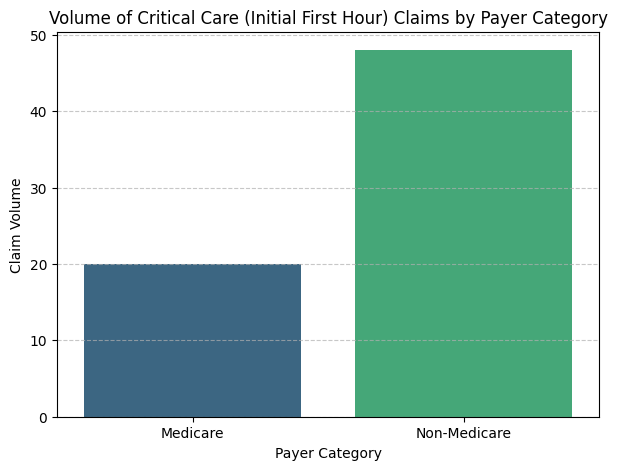

In [23]:
plt.figure(figsize=(7, 5))
sns.barplot(x='PayerCategory', y='ClaimVolume', data=critical_care_volume, palette='viridis')
plt.title('Volume of Critical Care (Initial First Hour) Claims by Payer Category')
plt.xlabel('Payer Category')
plt.ylabel('Claim Volume')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [44]:
critical_care_claims_by_payer = critical_care_claims.groupby('PrimaryPayerName').size().reset_index(name='ClaimVolume')
print("Critical care claims by payer DataFrame head:")
display(critical_care_claims_by_payer.head())

Critical care claims by payer DataFrame head:


,PrimaryPayerName,ClaimVolume
0,AETNA,6
1,AETNA MEDICARE,2
2,BLUES EXCHANGE,1
3,CIGNA HMO,2
4,DIRECT SELF PAY,5


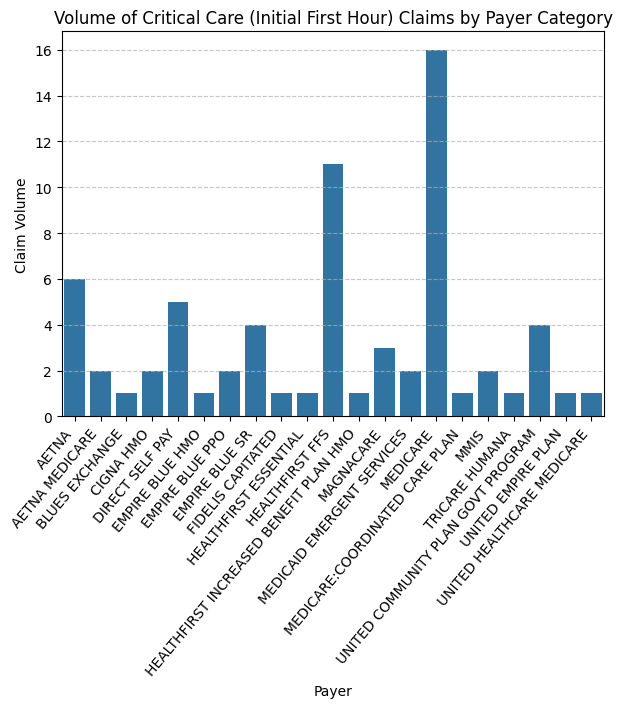

In [50]:
plt.figure(figsize=(7, 5))
sns.barplot(x='PrimaryPayerName', y='ClaimVolume', data=critical_care_claims_by_payer)
plt.title('Volume of Critical Care (Initial First Hour) Claims by Payer Category')
plt.xlabel('Payer')
plt.ylabel('Claim Volume')
plt.xticks(rotation=50, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Medicare has a smaller volume of patients designated with Critical Care within the first hour compared to the combination of other primary payers. However when compared individually with other Primary Payers, medicare retains the highest volume.